# Intorduction to neural network classification with Tensorflow

---
 In this notebook we are going to write neural networks for classification problems
There are a few types of classification such as:
* Binary classification
* Multiclass classification
* Multilabel classification


## Imports


In [16]:
# Ploting
import matplotlib.pyplot as plt
import seaborn as sns
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds
# Sk learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

## Create some data view it and fit it

In [17]:
from sklearn.datasets import make_circles


# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [18]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [19]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Lets visualize our data

In [20]:
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                       "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


 Now lets visualzie with plots

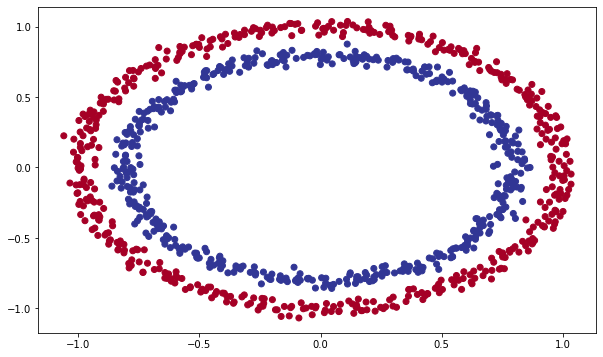

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0],X[:, 1],c=y,cmap=plt.cm.RdYlBu);

In [22]:
# Check the shape of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [23]:
# How many samples are we working
len(X),len(y)

(1000, 1000)

In [24]:
# View the first feature and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling a classfication problem

---

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model



In [25]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [26]:
# Now lets try to imporve our model by fitting it again but for more epochs

model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

The model practicaly just guesses the output.
So lets try to make a bette model by adding more hidden layers

In [28]:
# Build another model with more hidden layers

# Set up random seed
tf.random.set_seed(42)


# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5130


[0.694880485534668, 0.5130000114440918]

### Further improving our model

by changing:
* Activation on hidden layers


In [29]:
# Build model 3

# Set up random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="softmax"),
    tf.keras.layers.Dense(10,activation="softmax"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Early callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=5)


# 3. Fit the model
model_3.fit(X,
            y,
            epochs=1000,
            callbacks = [callback],
            verbose = 0)

# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.5000


[0.6953315138816833, 0.5]

## Lets try to visualize our models predictions

In [30]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [65]:
def plot_history(history):
  pd.DataFrame(history.history).plot(figsize=(10,6))
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.show()

doing multiclass classification...


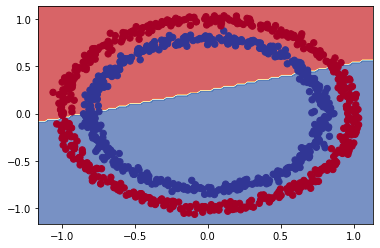

In [31]:
plot_decision_boundary(model_2,X,y)

We can notice that the model tries to find a straight line(regression) while we are actually working with a binary classification

### Non-Linearity

In [38]:
# Set up the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation="linear")                 
])

# 2. Compile our model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_4 = model_4.fit(X,y,epochs=100,verbose=0)

In [39]:
# 4. Evaluate the model
model_4.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.4710


[0.8103951811790466, 0.47099998593330383]

doing binary classifcation...


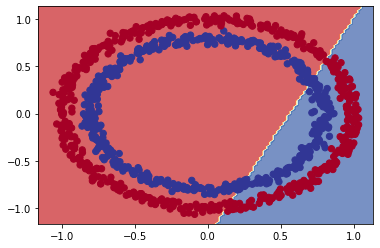

In [41]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_4,X,y)

Lets try some non-linear activations

In [74]:
# Set random seed
tf.random.set_seed(42)

# 1. Build model with non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_5 = model_5.fit(X,y,epochs=100,verbose=0)


# 4. Evaluate the model
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5390


[0.6931530833244324, 0.5389999747276306]

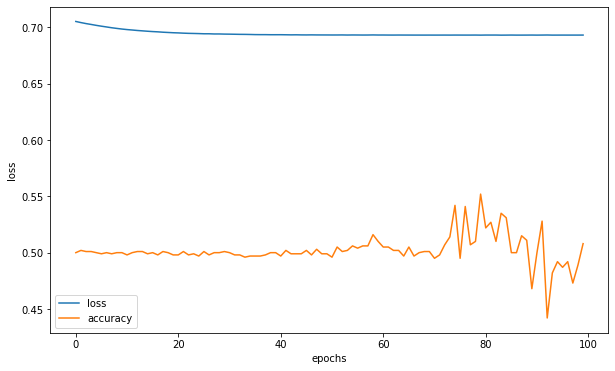

In [71]:
plot_history(history_5)

doing binary classifcation...


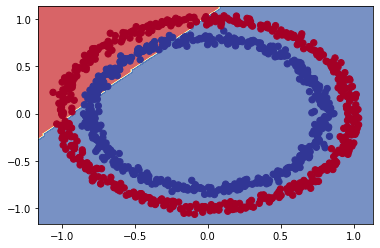

In [70]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_5,X,y)

In [59]:
# Time to make a multi layer neural network

# Set up random seed
tf.random.set_seed(42)

# 1. Build the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# 3. Fit the model
history_6 = model_6.fit(X,y,epochs=100,verbose=0)

# 4.Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

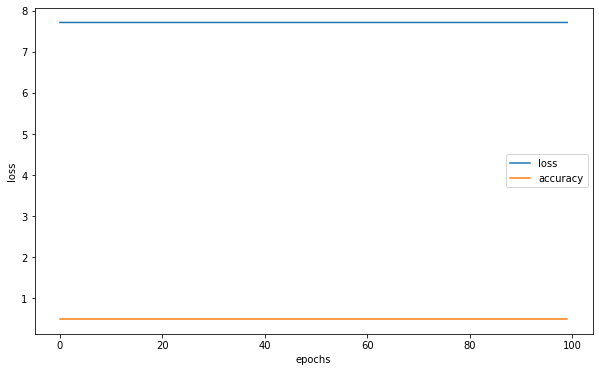

In [68]:
plot_history(history_6)

doing binary classifcation...


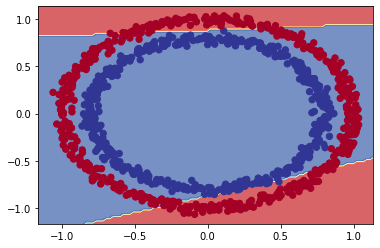

In [60]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_6,X,y)

In [75]:
# Time to try to build a model with a sigmoid output layer

# Set up random seed
tf.random.set_seed(42)

# 1. Build the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(X,y,epochs=100,verbose=0)

# 4. Evaluate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9960


[0.012382433749735355, 0.9959999918937683]

doing binary classifcation...


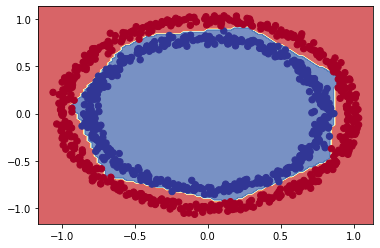

In [76]:
# Check the decision boundaries for our latest model
plot_decision_boundary(model_7,X,y)

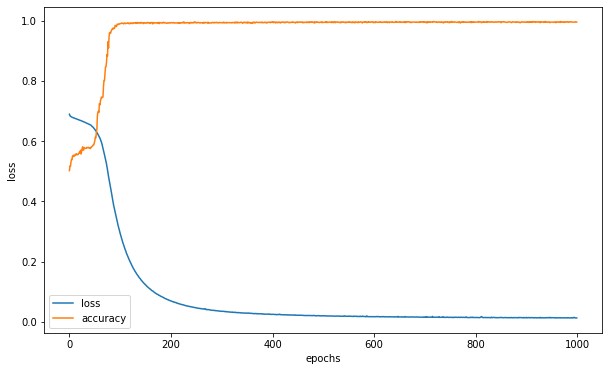

In [77]:
plot_history(history_7)